# Exploratory Data Analysis

In [16]:
#Import libraries
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Importing Datasets

### House Sales Dataset

This data is a dataset of house sales in King County, Washington. The dictionary below explains the meaning of each column.

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

In [2]:
#Import house sales data
kc_house_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/data/kc_house_data.csv')

#Looking at first 5 rows
kc_house_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [3]:
#Let's look at numeric summary of the data
kc_house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  3.015500e+04  3.015500e+04  30155.000000  30155.000000  30155.000000   
mean   4.538104e+09  1.108536e+06      3.413530      2.334737   2112.424739   
std    2.882587e+09  8.963857e+05      0.981612      0.889556    974.044318   
min    1.000055e+06  2.736000e+04      0.000000      0.000000      3.000000   
25%    2.064175e+09  6.480000e+05      3.000000      2.000000   1420.000000   
50%    3.874011e+09  8.600000e+05      3.000000      2.500000   1920.000000   
75%    7.287100e+09  1.300000e+06      4.000000      3.000000   2619.500000   
max    9.904000e+09  3.075000e+07     13.000000     10.500000  15360.000000   

           sqft_lot        floors    sqft_above  sqft_basement   sqft_garage  \
count  3.015500e+04  30155.000000  30155.000000   30155.000000  30155.000000   
mean   1.672360e+04      1.543492   1809.826098     476.039396    330.211142   
std    6.038260e+04      0.567717    878.306131     579.631302    285.770536   
min    4.020000e+02      1.000000      2.000000       0.000000      0.000000   
25%    4.850000e+03      1.000000   1180.000000       0.000000      0.000000   
50%    7.480000e+03      1.500000   1560.000000       0.000000    400.000000   
75%    1.057900e+04      2.000000   2270.000000     940.000000    510.000000   
max    3.253932e+06      4.000000  12660.000000    8020.000000   3580.000000   

         sqft_patio      yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  30155.000000  
mean     217.412038   1975.163953     90.922301     47.328076   -121.317397  
std      245.302792     32.067362    416.473038      1.434005      5.725475  
min        0.000000   1900.000000      0.000000     21.274240   -157.791480  
25%       40.000000   1953.000000      0.000000     47.405320   -122.326045  
50%      150.000000   1977.000000      0.000000     47.551380   -122.225585  
75%      320.000000   2003.000000      0.000000     47.669913   -122.116205  
max     4370.000000   2022.000000   2022.000000     64.824070    -70.074340

It seems we have some strange values in our set- a house with 0 `bedrooms` or `bathrooms` (this could be a placeholder) as well as a `sqft_living` space with a value of 3 feet. <br>
<br>
Our `yr_renovated` column does not seem very helpful as it only has homes renovated in 2022.<br>
<br>
These will be values we deal with when we prepare the data. 

In [4]:
#Looking at how many records and features we have
kc_house_df.shape 
# 30155 rows, 25 columns/features

(30155, 25)

In [5]:
#Look at column names and datatypes
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

It looks like our features are a mix of numeric values and strings. We will have to separate those later for modeling.

It also looks like we have some missing values in `heat_source` and `sewer_system`. We will have to deal with these later.

In [6]:
#Looking at first 5 rows of missing values for the sewer_system column.
kc_house_df[kc_house_df['sewer_system'].isna()].head()

id        date      price  bedrooms  bathrooms  sqft_living  \
759    724069123   12/1/2021  2925000.0         5        4.5         4670   
905   3225069328   8/25/2021  2500000.0         5        4.5         4200   
7944  9485700113   4/25/2022   800000.0         3        3.0         1850   
8329  7462900153  12/12/2021   300000.0         4        3.5         3230   
9655  3330500334  11/24/2021   699000.0         3        2.0         1340   

      sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
759       8147     2.0        YES        NO  ...          NaN       4670   
905      14836     2.0         NO        NO  ...          NaN       4200   
7944      1421     2.0         NO        NO  ...          NaN       1440   
8329     72454     2.0         NO        NO  ...          NaN       3230   
9655       868     2.0         NO        NO  ...          NaN        870   

     sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
759              0         860        120     2021             0   
905              0         650         90     2021             0   
7944           410           0        300     2022             0   
8329             0         700        480     2022             0   
9655           470           0        460     2019             0   

                                                address        lat        long  
759   2649 East Lake Sammamish Parkway Southeast, Sa...  47.585570 -122.084370  
905   19806 Southeast 8th Street, Sammamish, Washing...  47.602385 -122.075195  
7944  8424 24th Avenue Southwest, Seattle, Washingto...  47.527487 -122.363185  
8329  Southeast 104th Street, North Bend, Washington...  47.506180 -121.765180  
9655  4207 S Brandon St, Seattle, Washington 98118, ...  47.553320 -122.280200  

[5 rows x 25 columns]

In [7]:
#Look at 1st record's address to see what it includes
kc_house_df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

We have the city and zip code which could be useful as a separate feature later.

In [8]:
#Look at nuisance as this could be a valuable feature for our stakeholder
kc_house_df['nuisance'].value_counts(normalize=True)

NO     0.825502
YES    0.174498
Name: nuisance, dtype: float64

The majority (82.5%) of homes in King County do not have any sort of nuisance (defined as traffic noise or other recorded nuisances). This is a good sign for families looking for quiet neighborhoods.

Let's visually inspect our data

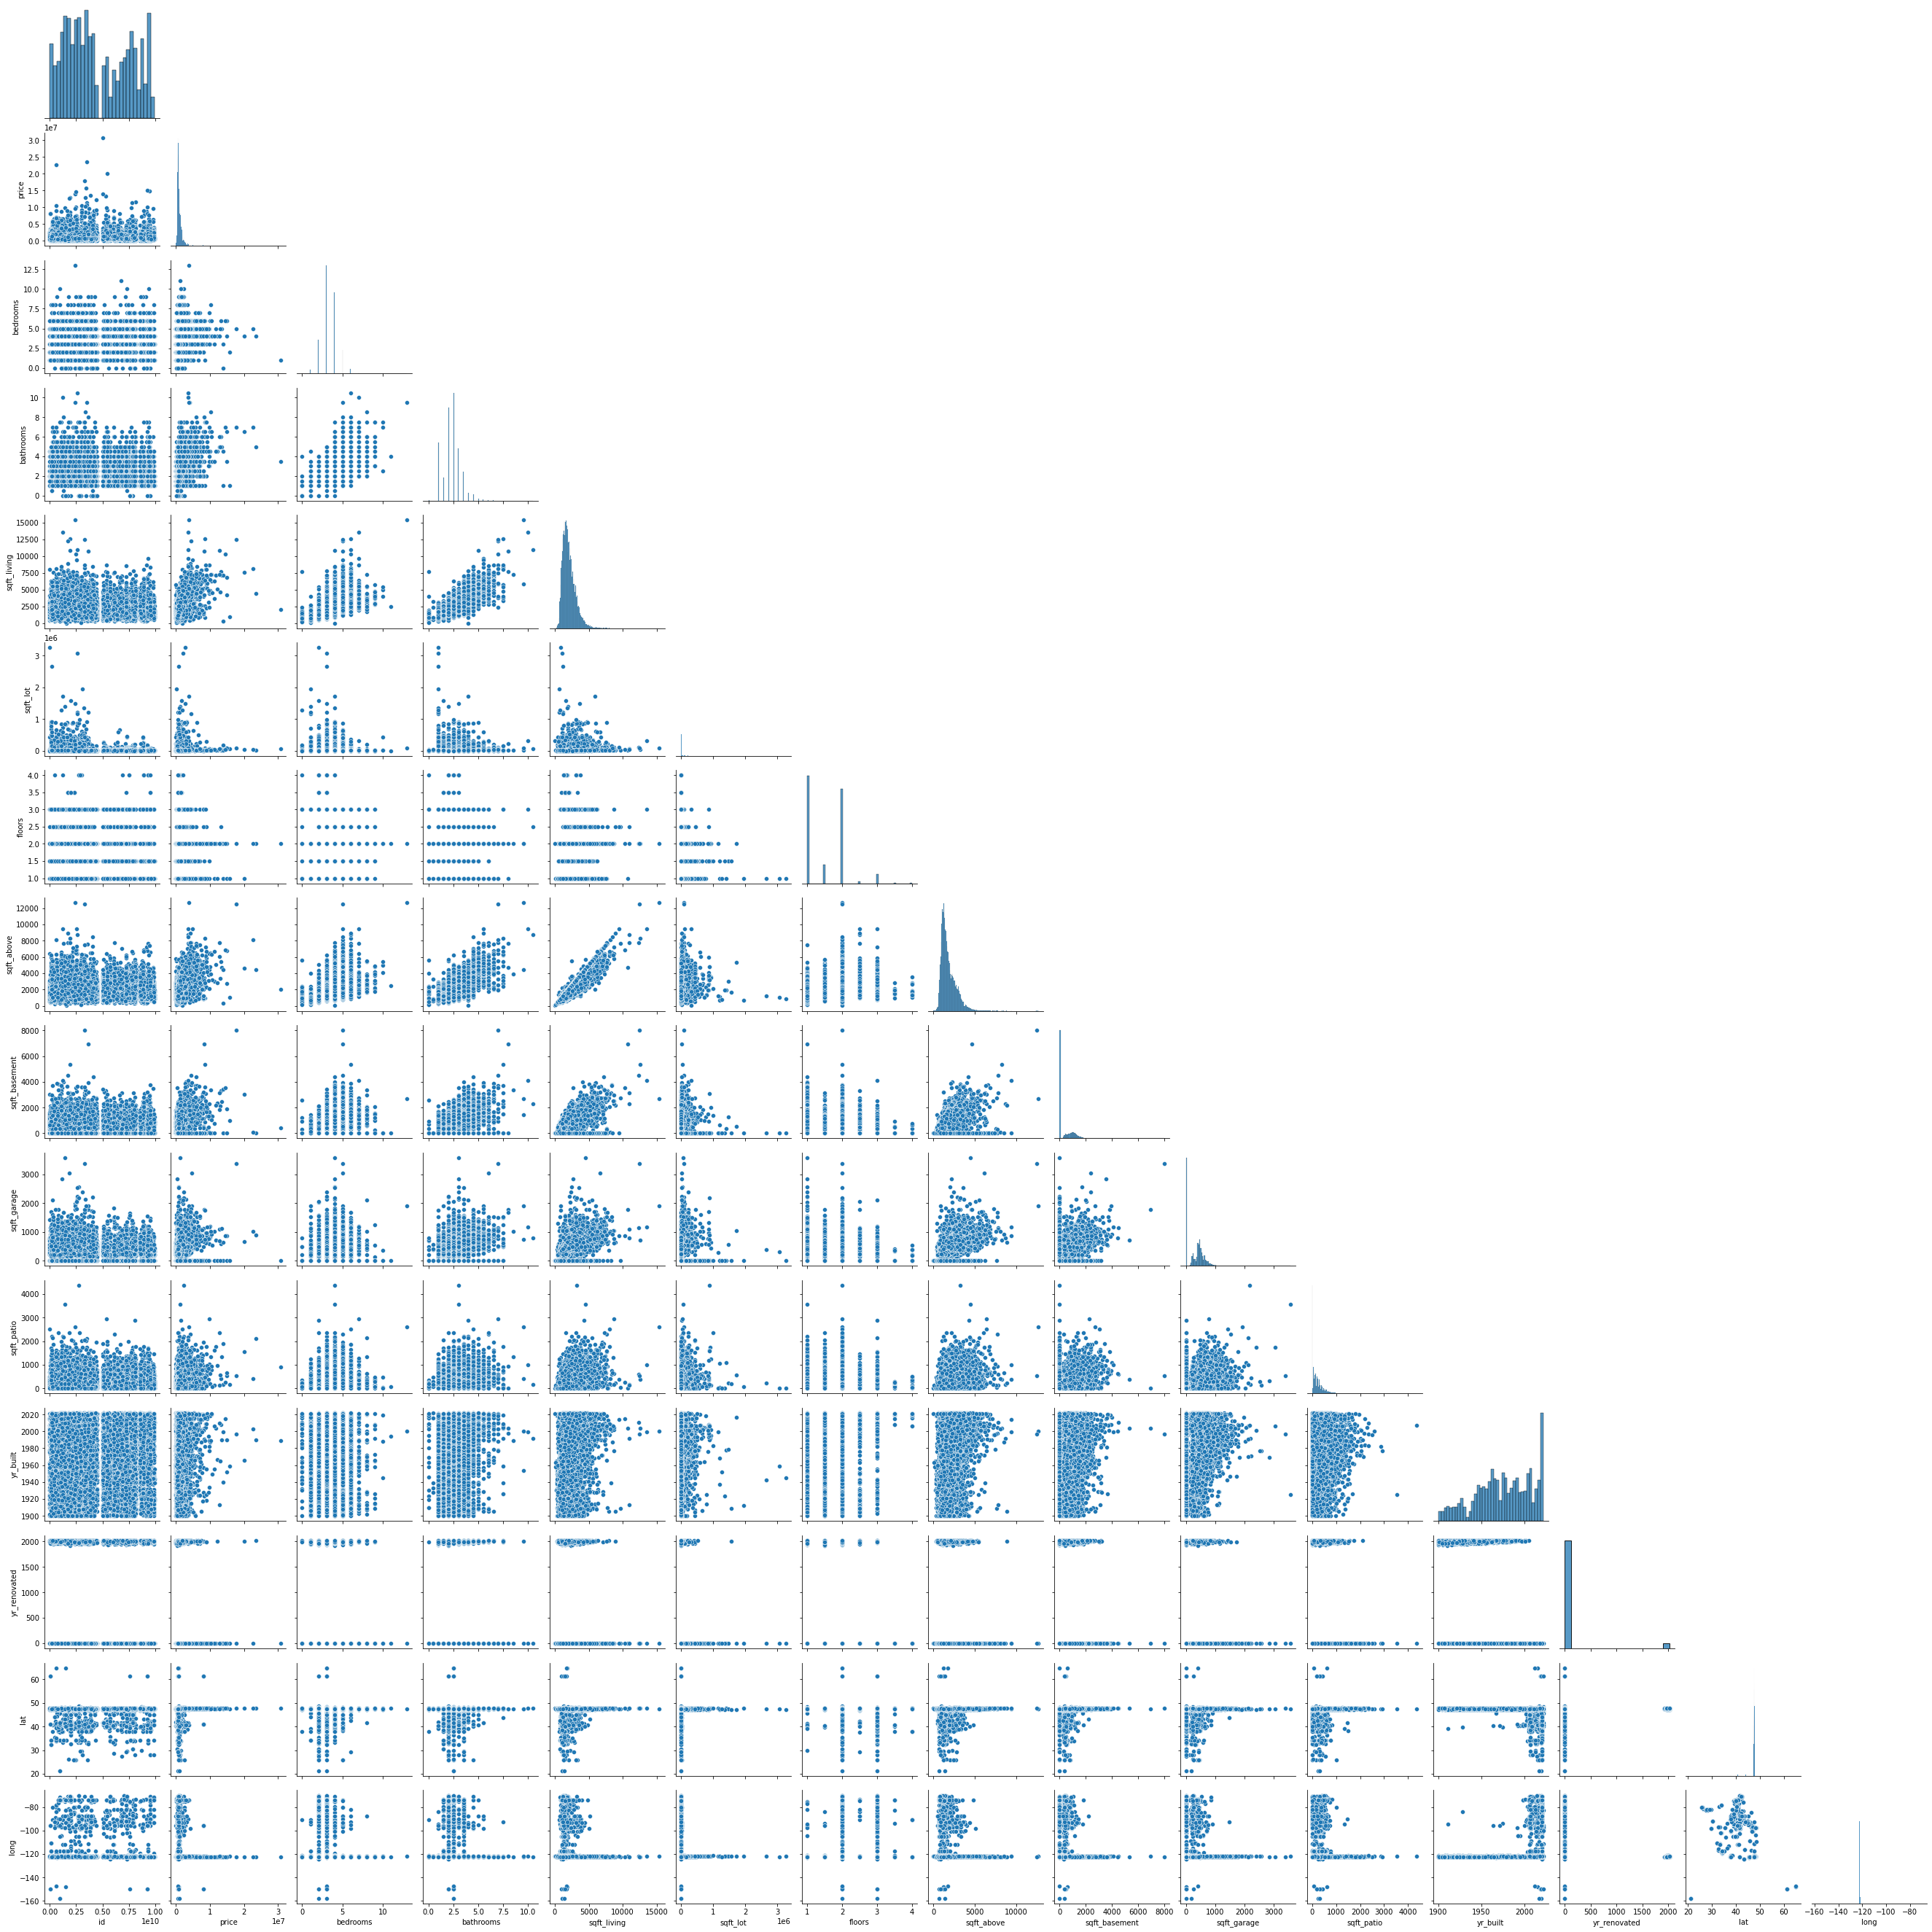

In [9]:
#Pariplot of dataframe
sns.pairplot(kc_house_df, corner=True)

Although the number of features graphed in this pairplot is overwhelming, it does provide some interesting insights. We can see that a majority of the features are skewed to the right (`price`, `bathrooms`, `sqft_living`, `sqft_above`, `sqft_garage`,`sqft_patio`) while `yr_built` is most obviously skewed to the left.

We can also see the relationship `price` has with other variables. It seemed to be positively correlated with `sqft_living`, `sqft_above`, `bedrooms`, and `bathrooms`.

Let's look more closely at our `price` distribution

In [21]:
#Histogram of price variable
px.histogram(data_frame = kc_house_df, x = 'price',\
             labels={'price':"House Sale Price"},
             title="Distribution of House Sale Prices in King County, WA")

As we can see, `price` has a large number of outliers. We will have to standardize this data to have a normal distribution to model.

Let's also look at what seemed to be one of our strongest positive correlations with `price` and `sqft_living`.

In [28]:
#Scatterplot of price and sqft_living
px.scatter(data_frame = kc_house_df, x= 'sqft_living', y = 'price',\
           trendline = 'ols',trendline_color_override = 'red',\
           labels={'sqft_living':'Square Foot Living Area', 'price':"House Sale Price"},\
           title="Relationship between Living Area Sqaure Footage and House Sale Prices")

### School District Dataset

This dataset is from https://data.wa.gov/ and is a 2021-2022 report card brekadown of public school standardized test scores grouped by student demographic for schools in the entirety of Washington state. The columns are defined by the dictionary below:

* `SchoolYear` - 6 character year displayed as YYYY-YY (e.g., 2019-20)
* `OrganizationLevel` - The level at which the data is aggregated.  Allowable values = School, District, County, and State.
* `County` - County Name in which the school or district resides. When OrganizationLevel = "State", this field will be reported as "Multiple"
* `ESDName` - Name the the Educational Service District serving the district or school. When OrganizationLevel = "State", this field will be NULL
* `ESDOrganizationID` - Unique ESD Identification number. When OrganizationLevel = "State", this field  will be NULL
* `DistrictCode` - Unique district code. When OrganizationLevel = "State", this field  will be NULL
* `DistrictName` - District name. When OrganizationLevel = "State", this field  will be NULL
* `DistrictOrganizationId` - Unique district identification number. When OrganizationLevel = "State", this field  will be NULL
* `SchoolCode` - Unique school code. When OrganizationLevel = "State" or "District", this field  will be NULL
* `SchoolName` - School name. When OrganizationLevel = "State" or "District", this field  will be NULL
* `SchoolOrganizationid` - Unique school identification number. When OrganizationLevel = "State" or "District", this field  will be NULL
* `CurrentSchoolType` - School type code, please see https://eds.ospi.k12.wa.us/DirectoryEDS.aspx for more on school type codes
* `StudentGroupType` - This field describes the student group type being measured: Gender, Race/ethnicity, and student characteristic groups like low income, English Language Learners, and students with disabilities. 
* `StudentGroup` - This field describes the students by parsing out the Specific StudentGroupType into their subgroups: such as Male, Female, and Gender X, or Non Low-income and Low Income student groups. 
* `GradeLevel` - Designates grade of students, "All Grades" identifies rows in which all students were counted (regardless of Grade)
* `Subject` - This field indactes if the data in the following columns is specific to ELA data or Math data.
* `Suppression` - This describes if the data has been suppresssed in accordance with our suppression guidelines. For more information about our suppression methods please see: https://www.k12.wa.us/data-reporting/protecting-student-privacy
* `MedianSGP` - The median SGP for the indicated row of data. In cases of suppression field will be blank
* `StudentCount` - Unique count of students with a growth calculation. In cases of suppression field will be blank.
* `NumberLowGrowth` - Unique count of students that had growth percentiles placing them in the bottom 1/3 of the state. In cases of suppression field will be blank.
* `NumberTypicalGrowth` - Unique count of students that had growth percentiles placing them above the bottom 1/3 but below the top 1/3 of thunique count of students that had growth percentiles placing them in the top 1/3 of the state. In cases of suppression field will be blank.
* `PercentLowGrowth` - Percent of students that had growth percentiles placing them in the bottom 1/3 of the state. In cases of suppression field will be blank.
* `PercentTypicalGrowth` - Percent of students that had growth percentiles placing them above the bottom 1/3 but below the top 1/3 of the state. In cases of suppression field will be blank.
* `PercentHighGrowth` - Percent of students that had growth percentiles placing them in the top 1/3 of the state. In cases of suppression field will be blank.
* `DataAsOf` - Date the file was last updated

In [10]:
#Import School Districts dataset
schools_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/data/Report_Card_Assessment_Data_2021-22_School_Year.csv')

#Preview the first 5 rows
schools_df.head()

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


SchoolYear OrganizationLevel        County                 ESDName  \
0    2021-22          District  Grays Harbor  Capital Region ESD 113   
1    2021-22          District  Grays Harbor  Capital Region ESD 113   
2    2021-22          District  Grays Harbor  Capital Region ESD 113   
3    2021-22          District  Grays Harbor  Capital Region ESD 113   
4    2021-22          District  Grays Harbor  Capital Region ESD 113   

   ESDOrganizationId  DistrictCode              DistrictName  \
0           100004.0       14005.0  Aberdeen School District   
1           100004.0       14005.0  Aberdeen School District   
2           100004.0       14005.0  Aberdeen School District   
3           100004.0       14005.0  Aberdeen School District   
4           100004.0       14005.0  Aberdeen School District   

   DistrictOrganizationId  SchoolCode      SchoolName  ...  \
0                100010.0         NaN  District Total  ...   
1                100010.0         NaN  District Total  ...   
2                100010.0         NaN  District Total  ...   
3                100010.0         NaN  District Total  ...   
4                100010.0         NaN  District Total  ...   

   Count of students expected to test including previously passed  \
0                                              176.0                
1                                              107.0                
2                                              111.0                
3                                                NaN                
4                                                NaN                

  CountMetStandard PercentMetStandard PercentLevel1 PercentLevel2  \
0             54.0              30.7%      0.460227      0.221591   
1             35.0              32.7%      0.420561      0.224299   
2             39.0              35.1%      0.441441      0.198198   
3              NaN   Suppressed: N<10           NaN           NaN   
4              NaN   Suppressed: N<10           NaN           NaN   

  PercentLevel3 PercentLevel4 PercentMetTestedOnly  PercentNoScore  DataAsOf  
0      0.198864      0.107955             0.310345        0.011364  9/7/2022  
1      0.196262      0.130841             0.336538        0.028037  9/7/2022  
2      0.198198      0.153153             0.354545        0.009009  9/7/2022  
3           NaN           NaN                  NaN             NaN  9/7/2022  
4           NaN           NaN                  NaN             NaN  9/7/2022  

[5 rows x 29 columns]

In [11]:
#Create a new subset of just the King County Schools
king_school_df = schools_df[schools_df.County == "King"].copy()

# Preview our new subset
king_school_df.head()

SchoolYear OrganizationLevel County  \
311    2021-22          District   King   
312    2021-22          District   King   
313    2021-22          District   King   
314    2021-22          District   King   
315    2021-22          District   King   

                                          ESDName  ESDOrganizationId  \
311  Puget Sound Educational Service District 121           100006.0   
312  Puget Sound Educational Service District 121           100006.0   
313  Puget Sound Educational Service District 121           100006.0   
314  Puget Sound Educational Service District 121           100006.0   
315  Puget Sound Educational Service District 121           100006.0   

     DistrictCode            DistrictName  DistrictOrganizationId  SchoolCode  \
311       17408.0  Auburn School District                100016.0         NaN   
312       17408.0  Auburn School District                100016.0         NaN   
313       17408.0  Auburn School District                100016.0         NaN   
314       17408.0  Auburn School District                100016.0         NaN   
315       17408.0  Auburn School District                100016.0         NaN   

         SchoolName  ...  \
311  District Total  ...   
312  District Total  ...   
313  District Total  ...   
314  District Total  ...   
315  District Total  ...   

     Count of students expected to test including previously passed  \
311                                             1234.0                
312                                              299.0                
313                                              935.0                
314                                                NaN                
315                                              407.0                

    CountMetStandard PercentMetStandard PercentLevel1 PercentLevel2  \
311            582.0              47.2%      0.306321      0.188817   
312             46.0              15.4%      0.632107      0.180602   
313            536.0              57.3%      0.202139      0.191444   
314              NaN   Suppressed: N<10           NaN           NaN   
315            271.0              66.6%      0.144963      0.144963   

    PercentLevel3 PercentLevel4 PercentMetTestedOnly  PercentNoScore  DataAsOf  
311      0.260940      0.210697             0.487846        0.033225  9/7/2022  
312      0.140468      0.013378             0.159170        0.033445  9/7/2022  
313      0.299465      0.273797             0.592920        0.033155  9/7/2022  
314           NaN           NaN                  NaN             NaN  9/7/2022  
315      0.307125      0.358722             0.696658        0.044226  9/7/2022  

[5 rows x 29 columns]

In [12]:
#Look at how many records and features we have in our subset
king_school_df.shape
#146319 records, 29 columns/features

(146319, 29)

In [13]:
#Look at column names to see how we can connect this dataset with our House Sales data
king_school_df.columns

Index(['SchoolYear', 'OrganizationLevel', 'County', 'ESDName',
       'ESDOrganizationId', 'DistrictCode', 'DistrictName',
       'DistrictOrganizationId', 'SchoolCode', 'SchoolName',
       'SchoolOrganizationId', 'CurrentSchoolType', 'StudentGroupType',
       'StudentGroup', 'GradeLevel', 'TestAdministration', 'TestSubject',
       'Suppression', 'Count of Students Expected to Test',
       'Count of students expected to test including previously passed',
       'CountMetStandard', 'PercentMetStandard', 'PercentLevel1',
       'PercentLevel2', 'PercentLevel3', 'PercentLevel4',
       'PercentMetTestedOnly', 'PercentNoScore', 'DataAsOf'],
      dtype='object')

In [14]:
#Look at the school districts in our King County subset
king_school_df.DistrictName.value_counts()

Seattle School District No. 1              27136
Lake Washington School District            14470
Kent School District                       12693
Federal Way School District                12013
Highline School District                    9768
Northshore School District                  9572
Renton School District                      9106
Bellevue School District                    8219
Auburn School District                      8216
Issaquah School District                    7862
Shoreline School District                   5097
Snoqualmie Valley School District           4148
Tahoma School District                      3478
Enumclaw School District                    3264
Tukwila School District                     2342
Riverview School District                   2162
Mercer Island School District               1849
Vashon Island School District               1528
Rainier Prep Charter School District         698
Summit Public School: Atlas                  592
Skykomish School Dis

If we know what cities or zip codes are included in each school district then we could map each house to its approproate district.